In [97]:
import pandas as pd

In [98]:
df = pd.read_csv("../data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Auffälligkeiten**

- Der Datensatz hat 11.914 Einträge
- In der Spalte Market Category gibt es viele missing values -> komplexere Spalte, bestehend aus mehreren Strings 
- Die Benennung der Spalten ist nicht immer konsistent
- Spaltentypen float könnten wahrscheinlich teilweise int64 sein
- Spaltentypen für Driven Wheels einmal ansehen, ob wirklich object
- Ansonsten sehen die Datentypen korrekt kodiert aus

In [100]:
df.isna().sum().sort_values()

Make                    0
Model                   0
Year                    0
Transmission Type       0
Driven_Wheels           0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Engine Fuel Type        3
Number of Doors         6
Engine Cylinders       30
Engine HP              69
Market Category      3742
dtype: int64

Engine Fuel Type        3<br>
Number of Doors         6<br>
Engine Cylinders       30<br>
Engine HP              69<br>
-> Vielleicht kann man diese Informationen manuell finden.


Market Category      3742

Das sind die Spalten, in denen Werte fehlen.

In [101]:
df[df.duplicated()]  # keep=False

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [102]:
# Was für Werte fehlen in den Duplikaten?
df[df.duplicated()].isna().sum()

Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       0
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      366
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64

In [103]:
df.iloc[14]

Make                                         BMW
Model                                   1 Series
Year                                        2013
Engine Fuel Type     premium unleaded (required)
Engine HP                                  230.0
Engine Cylinders                             6.0
Transmission Type                         MANUAL
Driven_Wheels                   rear wheel drive
Number of Doors                              2.0
Market Category               Luxury,Performance
Vehicle Size                             Compact
Vehicle Style                              Coupe
highway MPG                                   28
city mpg                                      19
Popularity                                  3916
MSRP                                       31500
Name: 14, dtype: object

Wir sehen, dass es 715 Duplikate gibt. Dies kann aufgrund von Fehlern im Scraping oder dem Kombinieren der Datenquellen Edmunds und Twitter zustande kommen. Wir entfernen diese Duplikate.

In [104]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5), ob

In [105]:
df_no_duplicates["Engine Cylinders"].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

Die Spalte ist als float formatiert, weil es missing Values gibt.

**Fragen, die wir uns stellen:**
- Warum sind einige Werte nan?
- Welche Fahrzeuge haben 0 Zylinder?

In [106]:
df_no_duplicates[df_no_duplicates["Engine Cylinders"].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800


In [107]:
df_no_duplicates[df_no_duplicates["Engine Cylinders"].isna()].groupby(
    "Engine Fuel Type").count()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Engine Fuel Type,,,,,,,,,,,,,,,
electric,10,10,10,9,0,10,10,10,10,10,10,10,10,10,10
premium unleaded (required),17,17,17,17,0,17,17,17,17,17,17,17,17,17,17
regular unleaded,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3


In [108]:
df_no_duplicates[df_no_duplicates["Engine Cylinders"] == 0]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
4705,Honda,Fit EV,2013,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4706,Honda,Fit EV,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4785,Ford,Focus,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,110,5657,29170
4789,Ford,Focus,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,110,5657,29170


In [109]:
df_no_duplicates[df_no_duplicates["Engine Cylinders"]
                 == 0].groupby("Engine Fuel Type").count()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Engine Fuel Type,,,,,,,,,,,,,,,
electric,56,56,56,13,56,56,56,51,51,56,56,56,56,56,56


In [110]:
df_no_duplicates.loc[df_no_duplicates["Engine Cylinders"]
                     == 0, "Engine Cylinders"] = None
df_no_duplicates["Engine Cylinders"].unique()

array([ 6.,  4.,  5.,  8., 12., nan, 10.,  3., 16.])

Was ist mit den anderen Spalten, in denen Missing Values sind?

In [111]:
df_no_duplicates.isna().sum().sort_values()

Make                    0
Model                   0
Year                    0
Transmission Type       0
Driven_Wheels           0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Engine Fuel Type        3
Number of Doors         6
Engine HP              69
Engine Cylinders       86
Market Category      3376
dtype: int64

In [112]:
df_no_duplicates[df_no_duplicates["Engine Fuel Type"].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [113]:
# Gibt es dieses Fahrzeug öfter?

df_no_duplicates[df_no_duplicates["Model"] == "Verona"]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11326,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
11327,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
11328,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
11329,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


In [114]:
df_no_duplicates.loc[df_no_duplicates["Engine Fuel Type"].isna(),
                     "Engine Fuel Type"] = "regular unleaded"
df_no_duplicates[df_no_duplicates["Model"] == "Verona"]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11326,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
11327,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
11328,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
11329,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


Was ist mit der Anzahl Türen?

In [115]:
df_no_duplicates[df_no_duplicates["Number of Doors"].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,NaN,NaN,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,NaN,NaN,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,NaN,NaN,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,NaN,NaN,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [116]:
df_no_duplicates.loc[df_no_duplicates["Model"] == "FF", "Number of Doors"] = 2
df_no_duplicates.loc[df_no_duplicates["Model"]
                     == "Model S", "Number of Doors"] = 4

Warum fehlen Leistungsdaten?

In [117]:
df_no_duplicates[df_no_duplicates["Engine HP"].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,NaN,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,NaN,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,NaN,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,NaN,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,NaN,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,NaN,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,NaN,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,31950


Wir erkennen aktuell kein Muster und keinen Anhaltspunkt, um die Engine HP zu füllen. Wir sind aber etwas verwundert, warum bei Elektrofahrzeugen MPG angegeben wird. Wir vermuten, dass es sich dabei um die Reichweite handelt. Das müssen wir aber nochmal überprüfen.

- Vielleicht brauchen wir (für Elektrofahrzeuge) eine neue Spalten mit der Reichweite
- GPT sagt: Es gibt ein MPGe, welches den Verbrauch in KWh in MPG umrechnet. 1 Gallone entspricht 33,7 KW
- Wir stellen diese Frage erstmal nach hinten


Man könnte noch weitere Schritte für das Bereinigen der Daten vornehmen. Beispielsweise können wir die Driven_Wheels vereinfachen, wenn wir weniger Details bei der Unterscheidung benötigen

In [118]:
# Wie hat sich die Popularität der Marke BMW über die Jahre entwickelt
df_no_duplicates[df_no_duplicates["Make"] == "BMW"].groupby(["Year"]).agg(
    Popularity=("Popularity", "mean"))

,Popularity
Year,
1995,3916.0
1996,3916.0
1997,3916.0
2000,3916.0
2001,3916.0
2002,3916.0
2003,3916.0
2006,3916.0
2007,3916.0


Antwort: Die Popularität der Marken ist für jedes Auto und jedes Jahr gleich

In [119]:
df_no_duplicates[df_no_duplicates["Make"] == "Audi"]["Popularity"]

17       3105
19       3105
21       3105
22       3105
23       3105
         ... 
10901    3105
10902    3105
11178    3105
11179    3105
11180    3105
Name: Popularity, Length: 321, dtype: int64

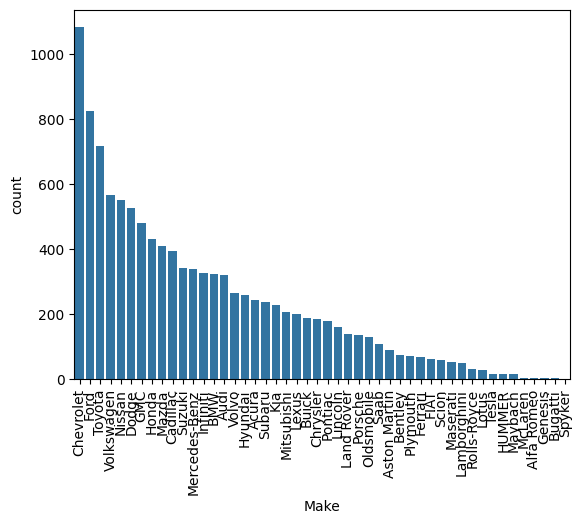

In [120]:
sns.barplot(df_no_duplicates["Make"].value_counts())
plt.xticks(rotation=90);

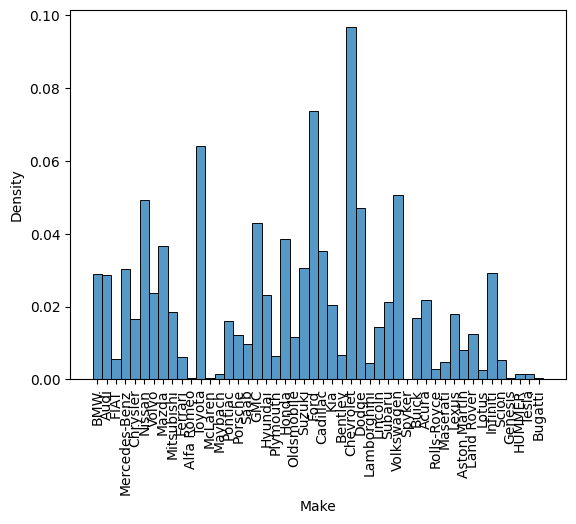

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_no_duplicates, x="Make", stat="density")
plt.xticks(rotation=90);

In [122]:
df_no_duplicates.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [123]:
df_no_duplicates.drop(columns=['Market Category'], axis=1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


### Decision Tree

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Drop 'Market Category' column
model_data = df_no_duplicates.drop(columns=['Market Category', 'Popularity', 'Model'], axis=1)

# Label encoding for object type columns
label_encoders = {}
for column in model_data.select_dtypes(include=['object']).columns:
    if column == 'Make':
        continue
    label_encoders[column] = LabelEncoder()
    model_data[column] = label_encoders[column].fit_transform(
        model_data[column]) 

# Split data into train and test sets
X = model_data.drop(columns=['Make']).reset_index(drop=True)
y = model_data['Make'].reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the decision tree model
model = DecisionTreeClassifier(random_state=73, criterion="log_loss")
model.fit(X_train, y_train)

# Predict and show the score
# y_pred = model.predict(X_test)
# score = accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
print(f'Accuracy: {score}')
# Predict and show the score for train data
# y_train_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)#accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_score}')

Accuracy: 0.8580357142857142
Train Accuracy: 0.9944190199799084


In [131]:
model.classes_

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Lotus', 'Maserati', 'Maybach', 'Mazda', 'McLaren',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
       'Pontiac', 'Porsche', 'Rolls-Royce', 'Saab', 'Scion', 'Spyker',
       'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

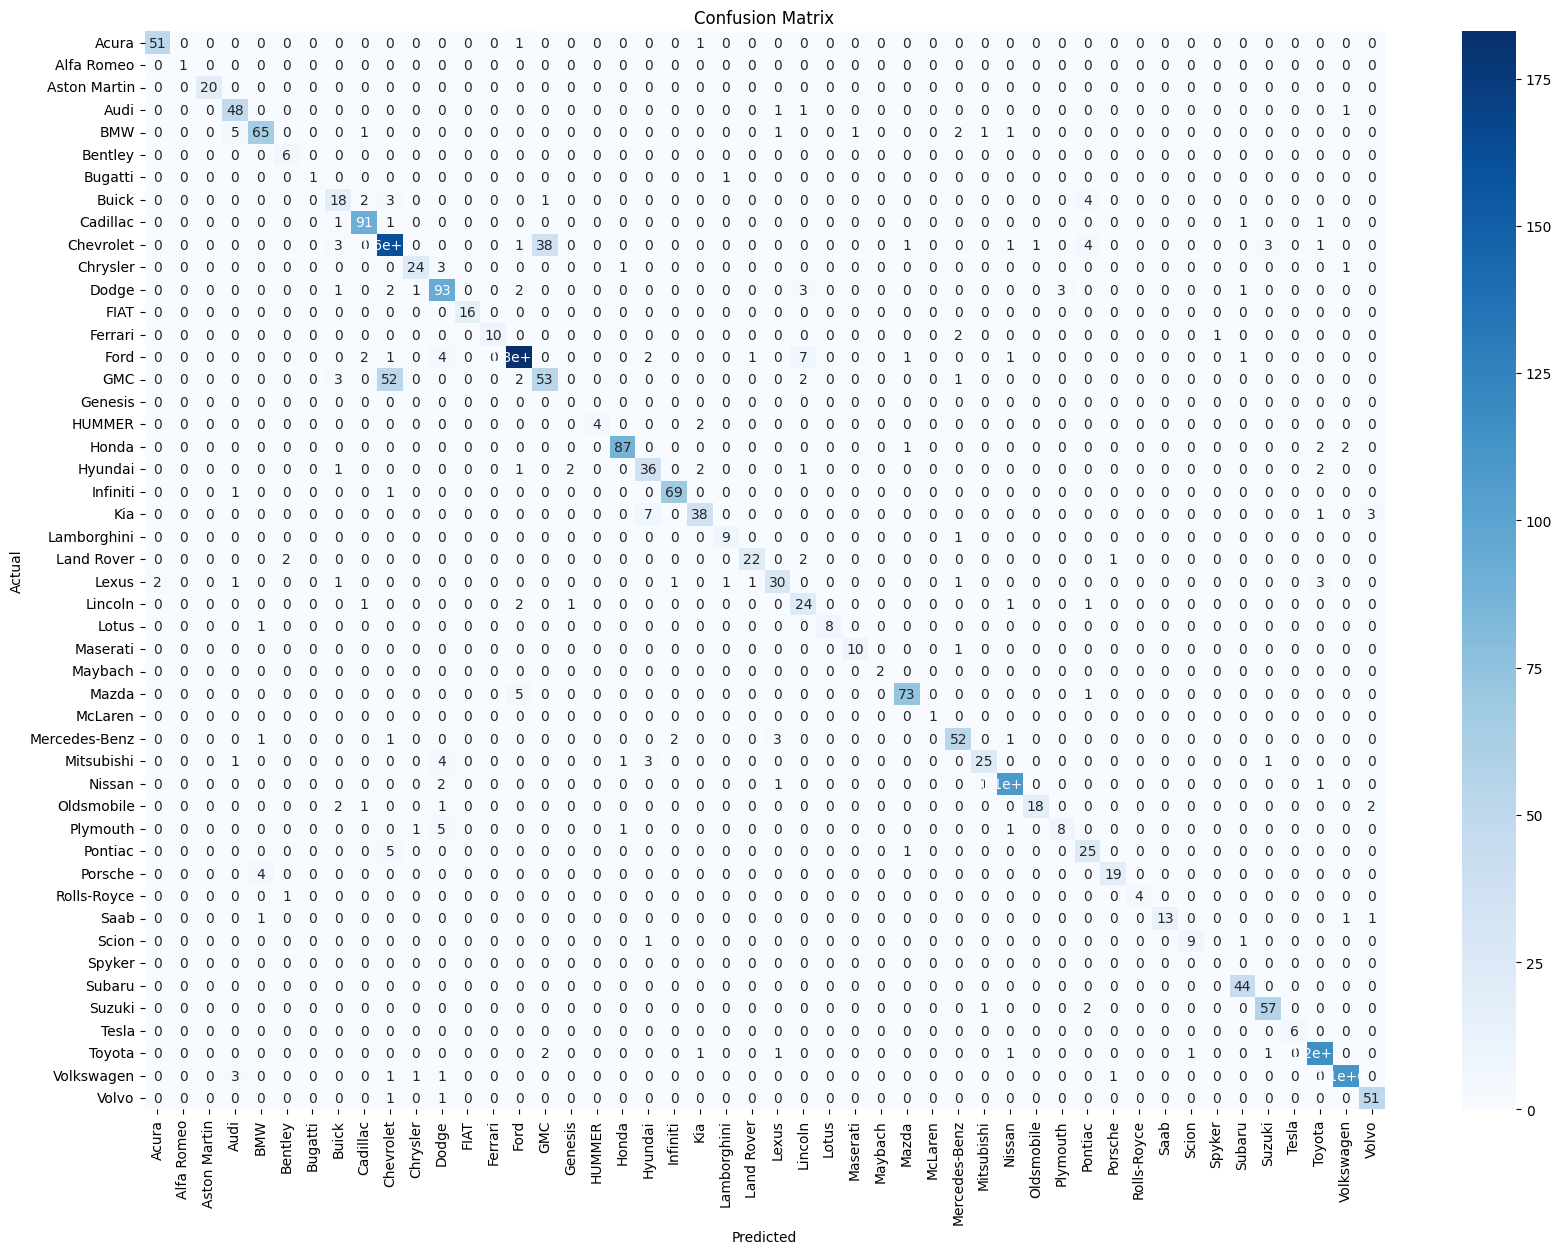

In [144]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

plt.figure(figsize=(20, 14))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [127]:
pd.DataFrame(label_encoders["Make"].classes_)

KeyError: 'Make'